In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, copy
from lab_utils_multi import  norm_plot

In [53]:
prop = pd.read_csv('uae-real-estate.csv')
prop.head() #5

,Name,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price
0,Elegant Unit| Golf Views| High-Floor| Prime Area,Apartment,24.463860,54.595603,747,0,1,Abu Dhabi,Yas Island,1300000
1,Sea & City View | Full Facilities | Prime Area,Apartment,24.487354,54.395122,"1,524",2,3,Abu Dhabi,Al Reem Island,1700000
2,Hot Offer|Furnished 2BR+M|Full Sea View|High F...,Apartment,24.492602,54.392677,"1,615",2,3,Abu Dhabi,Al Reem Island,1650000
3,Amazing Deal| Huge Layout | Big Terrace| Inves...,Apartment,24.484639,54.404103,"1,220",1,2,Abu Dhabi,Al Reem Island,800000
4,Luxurious Lifestyl|Exclusive Amenities|Invest Now,Apartment,24.538734,54.410601,"5,315",4,5,Abu Dhabi,Saadiyat Island,19000000


In [54]:
df = pd.DataFrame(prop,columns=['Area','Price','Bedrooms', 'Bathrooms'])
print(df)

         Area     Price  Bedrooms  Bathrooms
0         747   1300000         0          1
1       1,524   1700000         2          3
2       1,615   1650000         2          3
3       1,220    800000         1          2
4       5,315  19000000         4          5
...       ...       ...       ...        ...
29900   3,702   7250000         4          3
29901   2,110   3187000         3          2
29902   1,964   2250000         2          3
29903  18,000   6500000        10         10
29904   2,477   2400000         3          3

[29905 rows x 4 columns]


In [69]:
def rescale(arr):
    mean = arr.mean()
    sd = arr.std()

    new_arr = (arr - mean)/sd

    max = new_arr

    new_arr = new_arr

    return new_arr, mean, sd, max

In [66]:
def upscale_deviations(value, mean, sd, max):
    new_value = ((value*sd) + mean)

    return new_value

In [70]:
x1 = np.array([(int(i.replace(',', ''))) for i in prop["Area"].to_numpy()]).astype(float)
x2 = np.array(prop["Bedrooms"].to_numpy()).astype(float)
x3 = np.array(prop["Bathrooms"].to_numpy()).astype(float)
y = np.array(prop["Price"].to_numpy()).astype(float)

x1_train, x1_mean, x1_sd, x1_max = rescale(x1)
x2_train, x2_mean, x2_sd, x2_max = rescale(x2)
x3_train, x3_mean, x3_sd, x3_max = rescale(x3)
y_train, y_mean, y_sd, y_max = rescale(y)

print(x1.max(),x2.max(),x3.max(),y.max())

temp_x = np.dstack((x1_train, x2_train, x3_train))

X_train = temp_x[0]
print(X_train)
print(X_train.shape)
print(y_train)

124000.0 11.0 11.0 750000000.0
[[-0.01758099 -0.36455084 -0.43033428]
 [-0.01116605 -0.11645069 -0.14426742]
 [-0.01041475 -0.11645069 -0.14426742]
 ...
 [-0.00753339 -0.11645069 -0.14426742]
 [ 0.12486037  0.87594992  0.85696657]
 [-0.00329805  0.00759939 -0.14426742]]
(29905, 3)
[-0.00388103 -0.0033447  -0.00341174 ... -0.00260724  0.00309129
 -0.00240612]


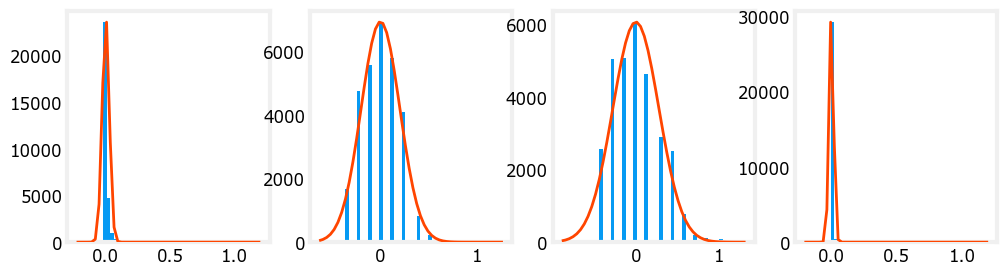

In [71]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))

norm_plot(ax[0],x1_train,)
norm_plot(ax[1],x2_train,)
norm_plot(ax[2],x3_train,)
norm_plot(ax[3],y_train,)

In [9]:
b_init = 5
w_init = np.array([5,5,5])

In [10]:
def predict(x, w, b):
    p = np.dot(x, w) + b
    return p

In [11]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (3,), x_vec value: [0.00602419 0.         0.09090909]
f_wb shape (), prediction: 5.48466642228739


In [12]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [13]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 35.586856810125276


In [14]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [15]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 8.268288023912215
dj_dw at initial w,b: 
 [0.22224944 2.45174346 3.30321566]


In [16]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history

In [18]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape

Iteration    0: Cost 0.00016351182614957751   
Iteration 1000: Cost 0.0001420173386272263   
Iteration 2000: Cost 0.00014006780519449708   
Iteration 3000: Cost 0.0001391085884965754   
Iteration 4000: Cost 0.00013857454195916554   
Iteration 5000: Cost 0.0001382237252092229   
Iteration 6000: Cost 0.00013795255429934828   
Iteration 7000: Cost 0.0001377166723439988   
Iteration 8000: Cost 0.00013749707629996026   
Iteration 9000: Cost 0.00013728561671935713   
b,w found by gradient descent: -0.00,[0.01587127 0.01281808 0.01200401] 


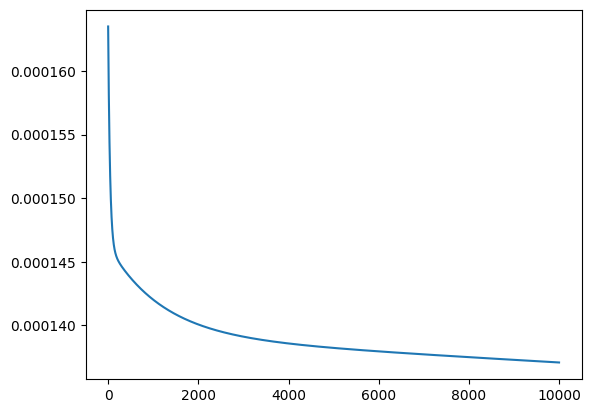

In [42]:
plt.plot(range(iterations), J_hist, label="J_history")